In [1]:
# import usual libraries for machine learing and data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Read CSV

In [2]:
import os

file_list = os.listdir("Dataset")
file_list = [file.replace(".csv", "") for file in file_list]

# put file names in file_list that have world splitTrain to file_list_train
file_list_train = [file for file in file_list if "splitTrain" in file]
file_list_test = [file for file in file_list if "splitTest" in file]

data_train = {}
for file in file_list_train:
    data_train[file.replace("splitTrain_", "").replace("splitTrain", "")] = pd.read_csv("Dataset/" + file + ".csv")

data_test = {}
for file in file_list_test:
    data_test[file.replace("splitTest_", "").replace("splitTest", "")] = pd.read_csv("Dataset/" + file + ".csv")


# KNN sklearn

In [3]:
# import f1 score metric from sklearn
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score

# function to get dictionary of f1 score prediction for each data train and data test using KNeighborsClassifier
def get_score(data_train, data_test, model, k):
    performanceData = {}
    for key in data_train:
        try:
            X_train = data_train[key].drop(["HeartDisease"], axis=1)
            y_train = data_train[key]["HeartDisease"]
            X_test = data_test[key].drop(["HeartDisease"], axis=1)
            y_test = data_test[key]["HeartDisease"]

            knn = model(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
        except:
            continue
        
        try:
          performanceData[key] = {'f1_score' : f1_score(y_test, y_pred)}
          performanceData[key]['accuracy'] = accuracy_score(y_test, y_pred)
          performanceData[key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
          performanceData[key]['roc_auc_score'] = roc_auc_score(y_test, y_pred)
          performanceData[key]['precision_score'] = precision_score(y_test, y_pred)
          performanceData[key]['recall_score'] = recall_score(y_test, y_pred)
        except:
          continue
            
    return performanceData

In [4]:
from sklearn.model_selection import KFold, cross_val_score

# function to cross validate the model using KFold
def cross_validate(data_train, model, n_neighbors):
    performanceData = {}
    for key in data_train:
      try:
        X_train = data_train[key].drop(["HeartDisease"], axis=1)
        y_train = data_train[key]["HeartDisease"]

        kf = KFold(n_splits=10, shuffle=True)
        scores = cross_val_score(model(n_neighbors=n_neighbors), X_train, y_train, cv=kf, scoring="f1_macro")
        performanceData[key] = scores.mean()
      except:
        continue
            
    return performanceData

In [5]:
list_f1_score_knnsklearn = get_score(data_train, data_test, KNeighborsClassifier, k=5)
df_list_f1_score_knnsklearn = pd.DataFrame.from_dict(list_f1_score_knnsklearn, orient='index')
df_list_f1_score_knnsklearn.sort_values(by=["f1_score", "accuracy"], ascending=[False, False], inplace=True)
df_list_f1_score_knnsklearn

,f1_score,accuracy,confusion_matrix,roc_auc_score,precision_score,recall_score
df_DF_modifiedOutlier_encoded_minmaxScaled,0.862385,0.864253,"[[97, 19], [11, 94]]",0.865722,0.831858,0.895238
df_encoded_minmaxScaled,0.849398,0.818841,"[[85, 28], [22, 141]]",0.808622,0.834320,0.865031
df_DF_encoded_minmaxScaled,0.846626,0.818841,"[[88, 25], [25, 138]]",0.812693,0.846626,0.846626
df_deleteOutlier_encoded_minmaxScaled,0.821256,0.824645,"[[89, 21], [16, 85]]",0.825338,0.801887,0.841584
df_modifiedOutlier_encoded_minmaxScaled,0.812785,0.814480,"[[91, 25], [16, 89]]",0.816051,0.780702,0.847619
df_DF_deleteOutlier_encoded_minmaxScaled,0.810256,0.824645,"[[95, 15], [22, 79]]",0.822907,0.840426,0.782178
df_DF_encoded_,0.707395,0.670290,"[[75, 38], [53, 110]]",0.669282,0.743243,0.674847
df_encoded_,0.703226,0.666667,"[[75, 38], [54, 109]]",0.666214,0.741497,0.668712
df_deleteOutlier_encoded_,0.622222,0.677725,"[[87, 23], [45, 56]]",0.672682,0.708861,0.554455
df_DF_deleteOutlier_encoded_,0.622222,0.677725,"[[87, 23], [45, 56]]",0.672682,0.708861,0.554455


In [14]:
cross_val_score_knnsklearn = cross_validate(data_train, KNeighborsClassifier, 5)

df_cross_val_score_knnsklearn = pd.DataFrame.from_dict(cross_val_score_knnsklearn, orient='index')
df_cross_val_score_knnsklearn.rename(columns={0: "f1"}, inplace=True)
df_cross_val_score_knnsklearn.sort_values(by=["f1"], ascending=False, inplace=True)
df_cross_val_score_knnsklearn

,f1
df_DF_encoded_stdScaled_rounded,0.858216
df_DF_encoded_minmaxScaled,0.850914
df_encoded_minmaxScaled,0.842050
df_DF_modifiedOutlier_encoded_minmaxScaled,0.820612
df_modifiedOutlier_encoded_minmaxScaled,0.812837
df_DF_deleteOutlier_encoded_minmaxScaled,0.806290
df_deleteOutlier_encoded_minmaxScaled,0.802436
df_DF_encoded_,0.657067
df_encoded_,0.646186
df_DF_modifiedOutlier_encoded_,0.617108


Text(0.5, 1.0, 'Cross Validation Score for KNN Sklearn')

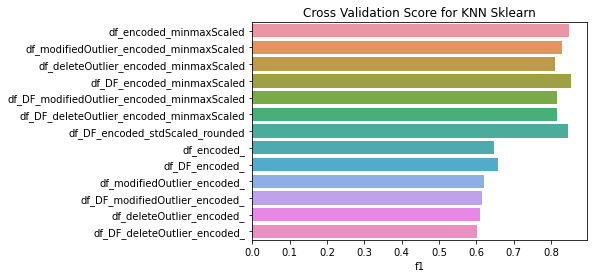

In [7]:
sns.barplot(x='f1', y=df_cross_val_score_knnsklearn.index, data=df_cross_val_score_knnsklearn).set_title("Cross Validation Score for KNN Sklearn")

# KNN from scratch

In [8]:
from collections import Counter

def minkowski_distance(x, y, p):
    # return the minkowski distance between two points
    return np.linalg.norm(x - y, ord=p)

class KNN:
    def __init__(self, n_neighbors=5, p=3):
        self.k = n_neighbors
        self.p = p
        self.distance_function = minkowski_distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            # find the nearest neighbors of the point x
            distances = np.array([self.distance_function(
                X.iloc[i, :], self.X_train.iloc[j, :], 
                p=self.p) for j in range(len(self.X_train))])
            k_minimum_distances_indices = np.argsort(distances)[:self.k]
            k_minimum_distances_labels = self.y_train.iloc[
                k_minimum_distances_indices].to_numpy(
            )
            counter = Counter(k_minimum_distances_labels)
            y_pred[i] = counter.most_common(1)[0][0]
        return y_pred


In [9]:
list_f1_score_knnscratch = get_score(data_train, data_test, KNN, k=5)
df_list_f1_score_knnscratch = pd.DataFrame.from_dict(list_f1_score_knnscratch, orient='index')

In [10]:
df_list_f1_score_knnscratch.sort_values(by=["f1_score", "accuracy"], ascending=[False, False], inplace=True)
df_list_f1_score_knnscratch

,f1_score,accuracy,confusion_matrix,roc_auc_score,precision_score,recall_score
df_DF_modifiedOutlier_encoded_minmaxScaled,0.847926,0.850679,"[[96, 20], [13, 92]]",0.851888,0.821429,0.876190
df_encoded_minmaxScaled,0.844311,0.811594,"[[83, 30], [22, 141]]",0.799772,0.824561,0.865031
df_DF_encoded_minmaxScaled,0.838509,0.811594,"[[89, 24], [28, 135]]",0.807916,0.849057,0.828221
df_deleteOutlier_encoded_minmaxScaled,0.815534,0.819905,"[[89, 21], [17, 84]]",0.820387,0.800000,0.831683
df_DF_deleteOutlier_encoded_minmaxScaled,0.810256,0.824645,"[[95, 15], [22, 79]]",0.822907,0.840426,0.782178
df_modifiedOutlier_encoded_minmaxScaled,0.796380,0.796380,"[[88, 28], [17, 88]]",0.798358,0.758621,0.838095
df_encoded_,0.682274,0.655797,"[[79, 34], [61, 102]]",0.662441,0.750000,0.625767
df_DF_encoded_,0.682274,0.655797,"[[79, 34], [61, 102]]",0.662441,0.750000,0.625767
df_deleteOutlier_encoded_,0.648649,0.691943,"[[86, 24], [41, 60]]",0.687939,0.714286,0.594059
df_DF_deleteOutlier_encoded_,0.648649,0.691943,"[[86, 24], [41, 60]]",0.687939,0.714286,0.594059


<AxesSubplot:>

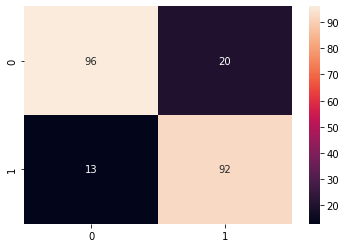

In [19]:
sns.heatmap(df_list_f1_score_knnscratch.loc['df_DF_modifiedOutlier_encoded_minmaxScaled']['confusion_matrix'], annot=True)

In [17]:

X = data_train['df_DF_modifiedOutlier_encoded_minmaxScaled'].drop(["HeartDisease"], axis=1)
y = data_train['df_DF_modifiedOutlier_encoded_minmaxScaled']["HeartDisease"]
kf = KFold(n_splits=5, random_state=0, shuffle=True)
model = KNN(n_neighbors=5)
scoresAccuracy = []
scoresRecall = []
scoresPrecision = []
scoresF1 = []
for train_index, test_index in kf.split(X, y):
    x_train, x_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    Y_train, Y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
    x_train = (x_train-np.min(x_train)) / \
        (np.max(x_train)-np.min(x_train)).values
    x_test = (x_test-np.min(x_test))/(np.max(x_test)-np.min(x_test)).values
    model.fit(x_train, Y_train)
    y_pred_test = model.predict(x_test)
    test_data_accuracy = accuracy_score(Y_test, y_pred_test)
    test_data_recall = recall_score(Y_test, y_pred_test)
    test_data_precision = precision_score(Y_test, y_pred_test)
    test_data_f1_score = f1_score(Y_test, y_pred_test)
    scoresAccuracy.append(test_data_accuracy)
    scoresRecall.append(test_data_recall)
    scoresPrecision.append(test_data_precision)
    scoresF1.append(test_data_f1_score)

print('Accuracy Scores Test Data: %.2f (%.2f)' %
      (np.mean(scoresAccuracy)*100, np.std(scoresAccuracy)*100))
print('Recall Scores Test Data: %.2f (%.2f)' %
      (np.mean(scoresRecall)*100, np.std(scoresRecall)*100))
print('Precision Scores Test Data: %.2f (%.2f)' %
      (np.mean(scoresPrecision)*100, np.std(scoresPrecision)*100))
print('F1 Scores Test Data: %.2f (%.2f)' %
      (np.mean(scoresF1)*100, np.std(scoresF1)*100))


/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/tridi/a

Accuracy Scores Test Data: 82.06 (3.00)
Recall Scores Test Data: 82.86 (4.76)
Precision Scores Test Data: 80.35 (7.40)
F1 Scores Test Data: 81.29 (3.80)


# Eksperimen

In [11]:
X_train = data_train["df_encoded_minmaxScaled"].drop(["HeartDisease"], axis=1)
y_train = data_train["df_encoded_minmaxScaled"]["HeartDisease"]
X_test = data_test["df_encoded_minmaxScaled"].drop(["HeartDisease"], axis=1)
y_test = data_test["df_encoded_minmaxScaled"]["HeartDisease"]

/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

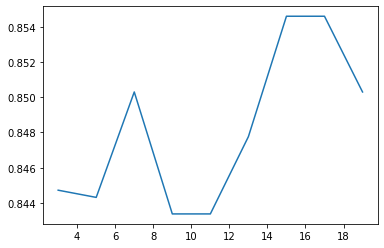

In [12]:
# efek nilai K dengan akurasi
k_range = list(range(3, 20, 2))

scores = []
for k in k_range:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

# plot the scores using sns
sns.lineplot(k_range, scores)

/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

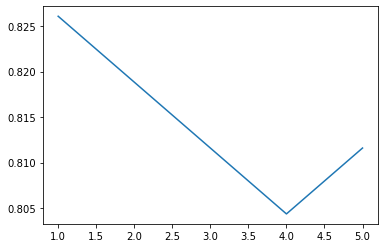

In [13]:
p_list = [1, 2, 3, 4, 5]

scores = []
for p in p_list:
    knn = KNN(n_neighbors=5, p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# plot the scores using sns
sns.lineplot(p_list, scores)